# Using the Exploratory Functions

This notebook contains examples of how to use the Exploratory module to do exploratory data analysis on your data.The data used in the examples is the wines dataset provied within eagle datasets. Examples include missing data analyses, getting descriptive stats of continous and categorical features, running batteries of tests and outcome analyses.

In [1]:
from eagles.data_sets import data_loader as dl
from eagles.Exploratory import explore, missing, distributions, categories ,outcomes
from eagles.Exploratory.utils import plot_utils as pu

import numpy as np

In [2]:
wines = dl.load_wines()
print(wines.shape)

(178, 14)


To make the data a little more realistic I'll add in some missing data and also convert the "class" column to str type as they are read in as ints even though they are labels. 

In [3]:
wines['class'] = wines['class'].astype(str)
wines = wines.mask(np.random.random(wines.shape) < .1)

## Missing Data

If you would like a plot as well to see if there are any trends in the missing data you can simply set plot=True. When plot is false only the table is displayed and returned.

,feature,percent_missing
0,class,12.921348
2,malic_acid,12.921348
6,total_phenols,11.797753
3,ash,11.235955
4,alcalinity_of_ash,11.235955
10,color_intensity,10.674157
13,proline,9.550562
7,flavanoids,8.988764
11,hue,8.988764
12,OD280_OD315_of_diluted_wines,8.988764


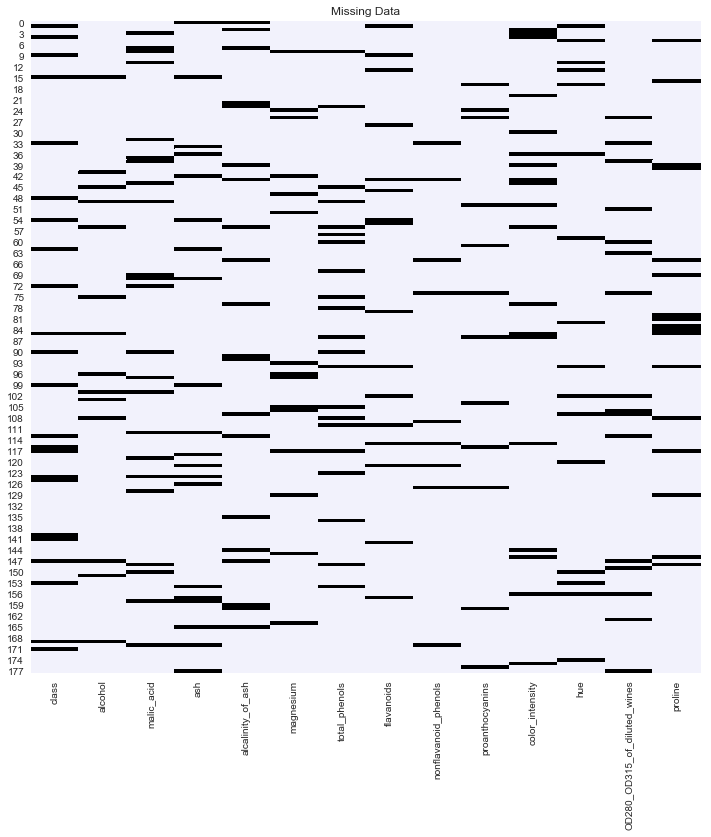

In [4]:
msg_df = missing.get_proportion_missing(data=wines, cols=[], plot=True)

## Get the base descriptive stats

In [5]:
descipt_df = explore.get_base_descriptives(data=wines)

,feature,mean,median,std,min,max,skew
0,alcohol,13.005244,13.050,0.808491,11.03,14.83,-0.055956
1,malic_acid,2.374258,1.890,1.152921,0.74,5.80,0.974509
2,ash,2.353608,2.360,0.264045,1.36,3.22,-0.398797
3,alcalinity_of_ash,19.557595,19.500,3.422710,10.60,30.00,0.212851
4,magnesium,99.987730,98.000,14.343230,70.00,162.00,1.091924
5,total_phenols,2.291720,2.350,0.627063,0.98,3.88,0.081893
6,flavanoids,1.971049,2.030,0.975765,0.34,3.93,-0.006796
7,nonflavanoid_phenols,0.359941,0.340,0.123811,0.14,0.66,0.511799
8,proanthocyanins,1.592410,1.555,0.576774,0.41,3.58,0.495792
9,color_intensity,5.009874,4.600,2.325051,1.28,13.00,0.935105


## Looking at Distributions and Potential Caps

,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.622225,15.430716,11.388263,10.579772,-0.055956
1,proline,1384.540020,1697.487048,NaN,NaN,0.733535
2,flavanoids,3.922580,4.898345,0.019519,-0.956246,-0.006796


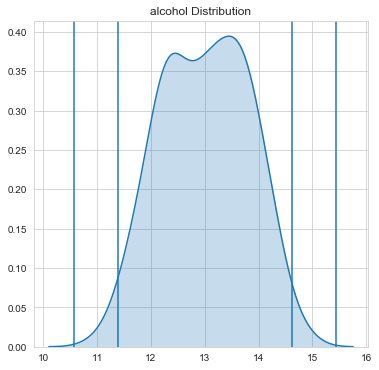

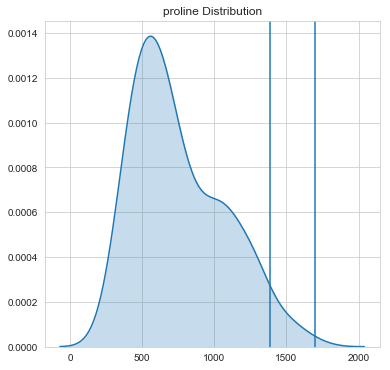

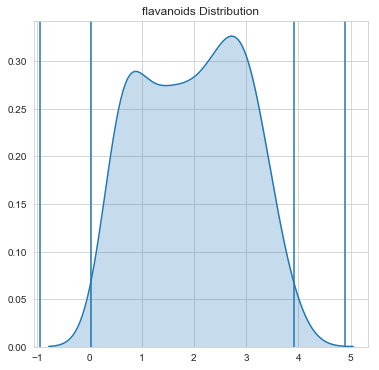

In [6]:
caps_df = distributions.find_caps(data=wines, cols=['alcohol', 'proline', 'flavanoids'], stats=['sd'] ,plot=True)

## Categories

,feature_by_category,count,proportion_samples
0,class_1,52,29.21
1,class_2,61,34.27
2,class_3,42,23.60


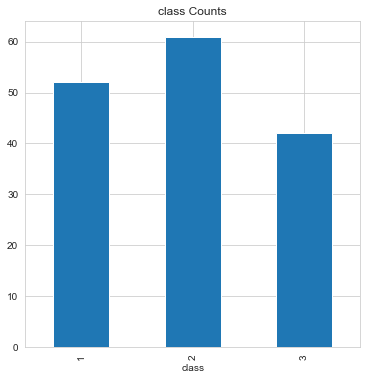

In [7]:
cat_df = categories.get_sample_stats(data=wines, cols=['class'] , plot=True)

## Batteries

The run_battery() function allows you to run multiple test by simply calling the explore.run_battery() function. When no tests are passed into the tests parameter all available tests are run

,stat,value
0,n_rows,178.00
1,n_cols,5.00
2,total_memory,7248.00
3,total_percent_missing,9.66


,feature,percent_missing
0,class,12.921348
2,proline,9.550562
3,flavanoids,8.988764
4,hue,8.988764
1,alcohol,7.865169


,feature,mean,median,std,min,max,skew
0,alcohol,13.005244,13.05,0.808491,11.03,14.83,-0.055956
1,proline,758.645963,675.00,312.947028,290.00,1680.00,0.733535
2,flavanoids,1.971049,2.03,0.975765,0.34,3.93,-0.006796
3,hue,0.958432,0.96,0.227232,0.48,1.71,0.063704


,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.622225,15.430716,11.388263,10.579772,-0.055956
1,proline,1384.540020,1697.487048,NaN,NaN,0.733535
2,flavanoids,3.922580,4.898345,0.019519,-0.956246,-0.006796
3,hue,1.412896,1.640127,0.503969,0.276737,0.063704


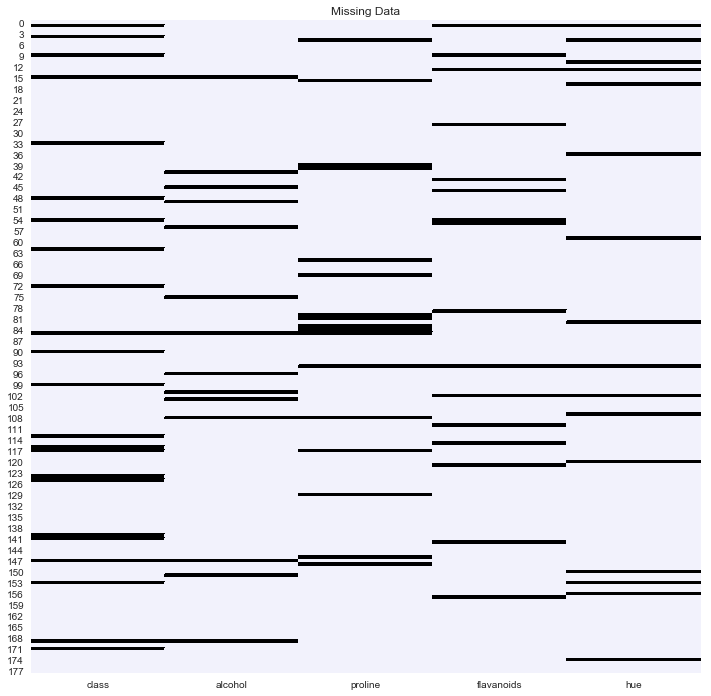

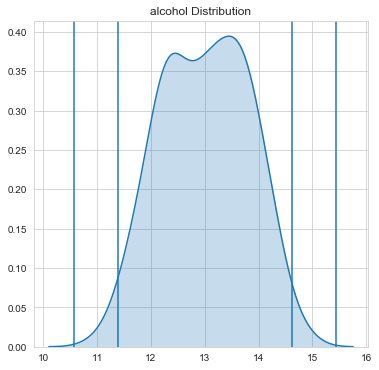

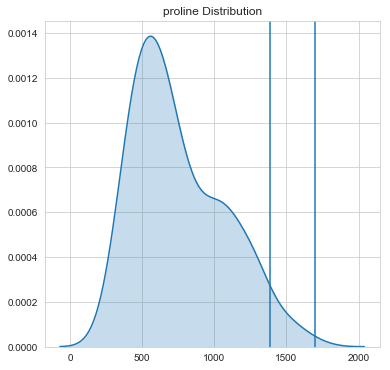

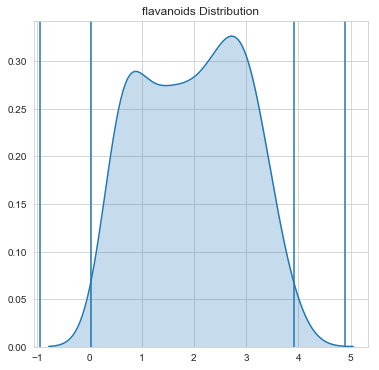

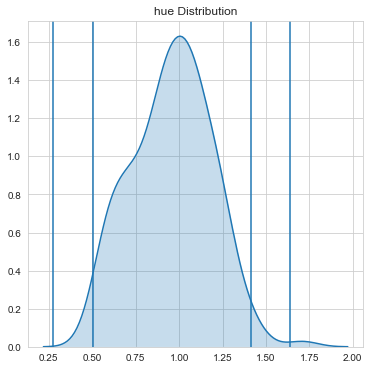

,feature_by_category,count,proportion_samples
0,class_1,52,29.21
1,class_2,61,34.27
2,class_3,42,23.60


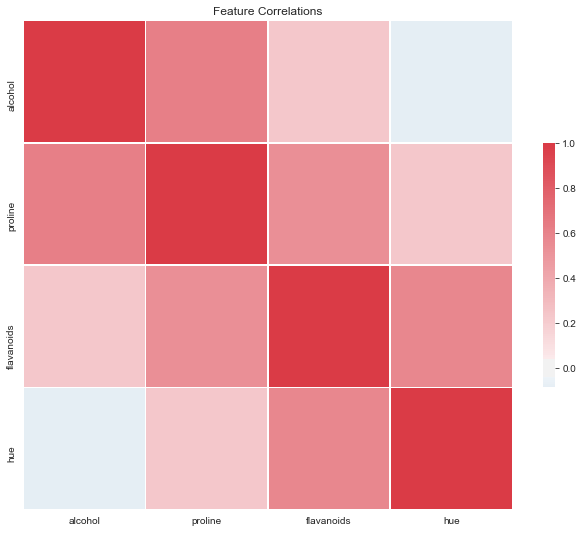

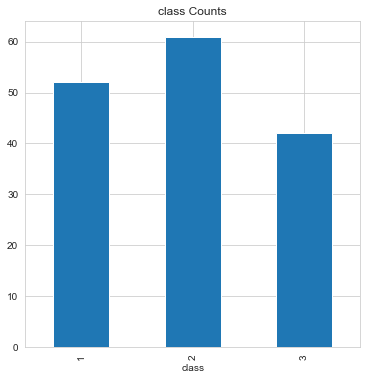

In [8]:
test_dict = explore.run_battery(data=wines
                                , categorical_cols=['class']
                                , continuous_cols=['alcohol', 'proline', 'flavanoids', 'hue'])

## Outcome Analyses

Another option in the exploratory module is an outcome oriented analysis. More specifically rather then analyzing features individually you can use the outcomes module to look at the relationships between your features and a specific outcome. For the purposes of this example I will be creating a dummy class as the outcome as the regress analysis for categorical outcomes currently only supports binary logistic regression. For regression analyses it will also simply drop rows where it decets na values in the features. Note that individual functions within the outcomes module return pandas dataframes however the stats_by_outcome() functions returns a dictionary with the keys corresponding to the returned pandas dataframes.

,dummy,mean_alcohol,std_alcohol,mean_proline,std_proline,mean_flavanoids,std_flavanoids,mean_hue,std_hue
0,0,0.439542,0.187839,0.224900,0.139004,0.338040,0.227412,0.358544,0.203420
1,1,0.713761,0.127826,0.601424,0.157776,0.738873,0.117753,0.463415,0.094478


         Current function value: 0.346651
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


,feature,coef,std err,z,P>|z|,[0.025,0.975]
0,alcohol,-7.0184,1.555,-4.515,0.0,-10.065,-3.971
1,proline,12.0944,2.410,5.018,0.0,7.370,16.819
2,flavanoids,5.7754,1.618,3.570,0.0,2.604,8.947
3,hue,-10.6919,2.493,-4.289,0.0,-15.578,-5.806


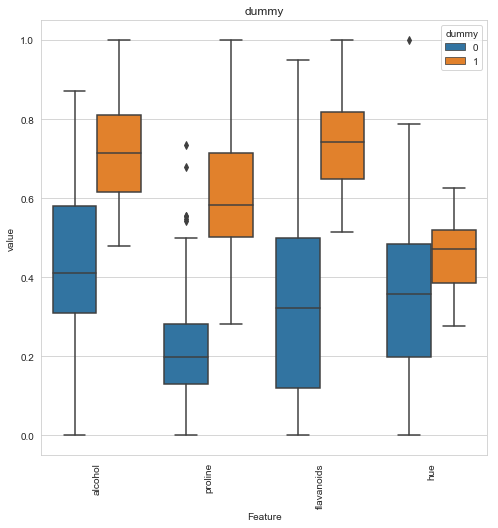

In [9]:
wines['dummy'] = list(map(lambda x: 1 if x == '1' else 0, wines['class']))

res_dict = outcomes.stats_by_outcome(data=wines
                                     , outcome_type='categorical'
                                     , outcome='dummy'
                                     , categorical_fts=[]
                                     , continuous_fts=['alcohol', 'proline', 'flavanoids', 'hue']
                                     , analyses=["descriptives", "regress"]
                                     , descriptive_stats=['mean', 'std']
                                     , scale='minmax'
                                     , plot=True
                                    )

In [10]:
print("Returned data: " + str(list(res_dict.keys())))

Returned data: ['descriptives', 'regress']


Now I'll do it with the outcome as a continous variable as oppoed to a categorical variable.

,outcome,feature,correlation
0,alcohol,proline,0.622165
1,alcohol,flavanoids,0.230363
2,alcohol,hue,-0.086440


,dummy,mean_alcohol,std_alcohol
0,0,0.439542,0.187839
1,1,0.713761,0.127826


,feature,coef,std err,t,P>|t|,[0.025,0.975]
0,dummy,-0.1837,0.072,-2.547,0.012,-0.327,-0.041
1,proline,1.0062,0.120,8.408,0.000,0.769,1.243
2,flavanoids,0.1670,0.109,1.529,0.129,-0.049,0.383
3,hue,0.2769,0.123,2.244,0.027,0.033,0.521


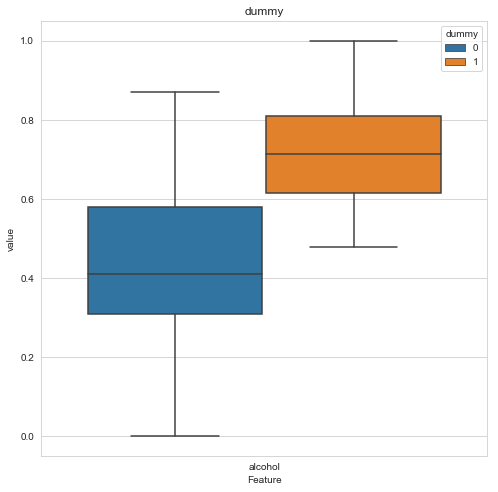

In [11]:
res_dict = outcomes.stats_by_outcome(data=wines
                                     , outcome_type='continuous'
                                     , outcome='alcohol'
                                     , categorical_fts=['dummy']
                                     , continuous_fts=['proline', 'flavanoids', 'hue']
                                     , analyses=["descriptives", "regress"]
                                     , descriptive_stats=['mean', 'std']
                                     , scale='minmax'
                                     , plot=True
                                    )

In [12]:
print("Returned data: " + str(list(res_dict.keys())))

Returned data: ['correlations', 'desc_df', 'regress']
